# Import Libraries dan Read dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sb

In [2]:
dataset = pd.read_csv('/content/drive/My Drive/BCML/auto-mpg.csv')

dataset.describe()

,cylinders,displacement,weight,acceleration,model year,origin,mpg
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864,23.514573
std,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055,7.815984
min,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000,9.000000
25%,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000,17.500000
50%,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000,23.000000
75%,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000,29.000000
max,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000,46.600000


# EDA dan Data Cleaning

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cylinders     398 non-null    int64  
 1   displacement  398 non-null    float64
 2   horsepower    398 non-null    object 
 3   weight        398 non-null    int64  
 4   acceleration  398 non-null    float64
 5   model year    398 non-null    int64  
 6   origin        398 non-null    int64  
 7   car name      398 non-null    object 
 8   mpg           398 non-null    float64
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [4]:
# Drop kolom
dataset.drop(['car name'], axis=1, inplace=True)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cylinders     398 non-null    int64  
 1   displacement  398 non-null    float64
 2   horsepower    398 non-null    object 
 3   weight        398 non-null    int64  
 4   acceleration  398 non-null    float64
 5   model year    398 non-null    int64  
 6   origin        398 non-null    int64  
 7   mpg           398 non-null    float64
dtypes: float64(3), int64(4), object(1)
memory usage: 25.0+ KB


In [5]:
dataset.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin,mpg
0,8,307.0,130,3504,12.0,70,1,18.0
1,8,350.0,165,3693,11.5,70,1,15.0
2,8,318.0,150,3436,11.0,70,1,18.0
3,8,304.0,150,3433,12.0,70,1,16.0
4,8,302.0,140,3449,10.5,70,1,17.0


In [6]:
# Replace nilai "?" dengan None

dataset.replace("?", np.nan, inplace=True)

In [7]:
dataset.isnull().sum().sort_values()

cylinders       0
displacement    0
weight          0
acceleration    0
model year      0
origin          0
mpg             0
horsepower      6
dtype: int64

In [8]:
dataset['horsepower'].value_counts()

150    22
90     20
88     19
110    18
100    17
       ..
158     1
94      1
132     1
137     1
133     1
Name: horsepower, Length: 93, dtype: int64

In [9]:
# Rata-rata
avg_horsepower = dataset['horsepower'].astype('float').mean(axis=0)

avg_horsepower

104.46938775510205

In [10]:
# Replace data none dengan nilai rata-rata2
dataset["horsepower"].replace(np.nan, avg_horsepower, inplace=True)
dataset.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin,mpg
0,8,307.0,130,3504,12.0,70,1,18.0
1,8,350.0,165,3693,11.5,70,1,15.0
2,8,318.0,150,3436,11.0,70,1,18.0
3,8,304.0,150,3433,12.0,70,1,16.0
4,8,302.0,140,3449,10.5,70,1,17.0


In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cylinders     398 non-null    int64  
 1   displacement  398 non-null    float64
 2   horsepower    398 non-null    object 
 3   weight        398 non-null    int64  
 4   acceleration  398 non-null    float64
 5   model year    398 non-null    int64  
 6   origin        398 non-null    int64  
 7   mpg           398 non-null    float64
dtypes: float64(3), int64(4), object(1)
memory usage: 25.0+ KB


In [12]:
# Casting data
dataset[["horsepower"]] = dataset[["horsepower"]].astype('int')

dataset.dtypes

cylinders         int64
displacement    float64
horsepower        int64
weight            int64
acceleration    float64
model year        int64
origin            int64
mpg             float64
dtype: object

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f23499032b0>,
      dtype=object)

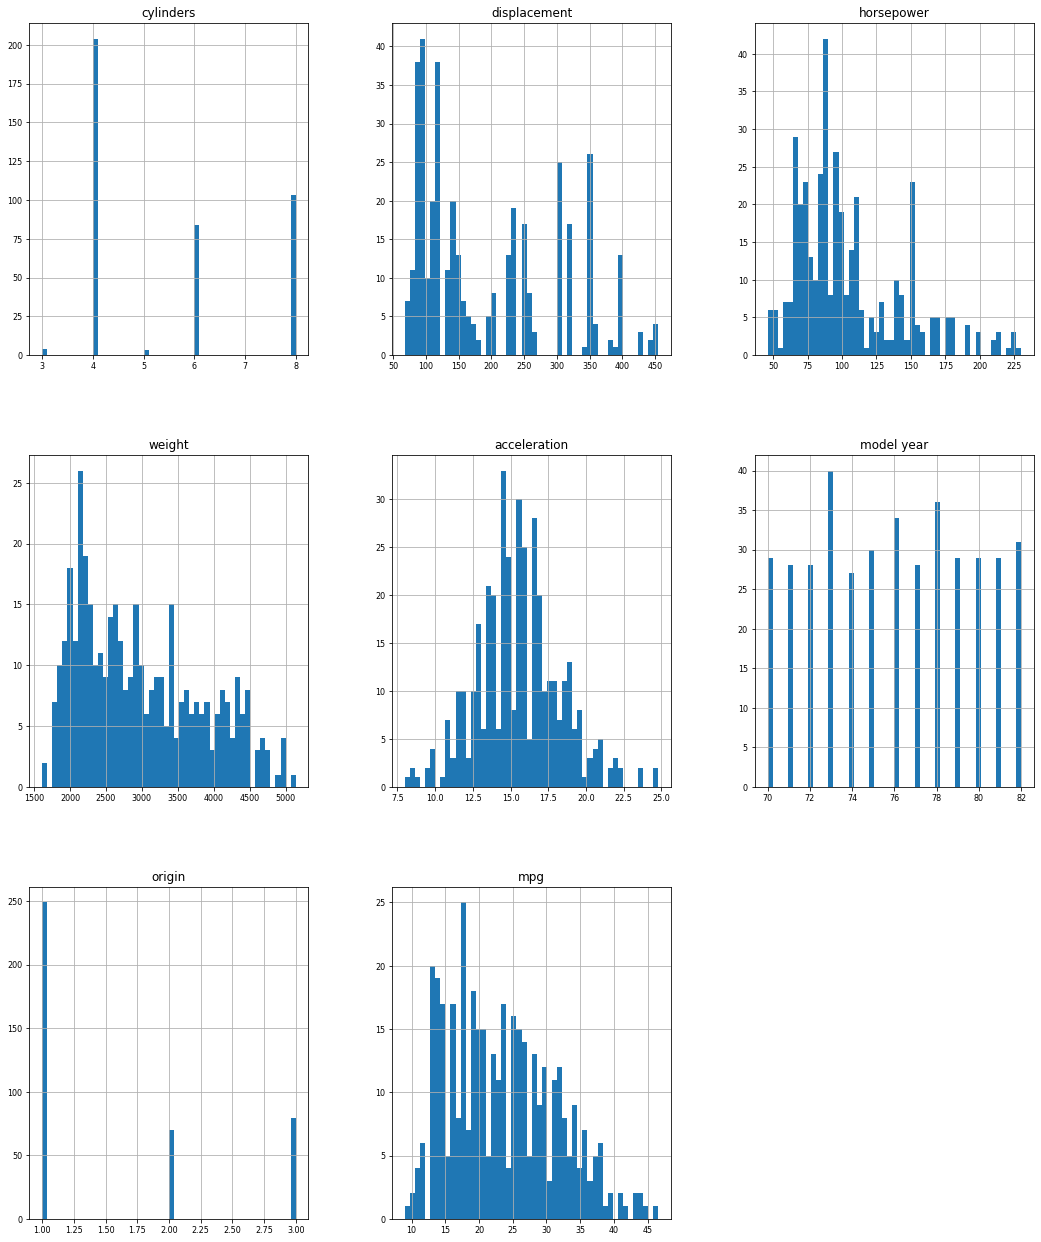

In [13]:
dataset.hist(figsize=(18, 22), bins=50, xlabelsize=8, ylabelsize=8)

In [14]:
corr = dataset.corr()

corr

,cylinders,displacement,horsepower,weight,acceleration,model year,origin,mpg
cylinders,1.000000,0.950721,0.839061,0.896017,-0.505419,-0.348746,-0.562543,-0.775396
displacement,0.950721,1.000000,0.893760,0.932824,-0.543684,-0.370164,-0.609409,-0.804203
horsepower,0.839061,0.893760,1.000000,0.860676,-0.684376,-0.411750,-0.453613,-0.771543
weight,0.896017,0.932824,0.860676,1.000000,-0.417457,-0.306564,-0.581024,-0.831741
acceleration,-0.505419,-0.543684,-0.684376,-0.417457,1.000000,0.288137,0.205873,0.420289
model year,-0.348746,-0.370164,-0.411750,-0.306564,0.288137,1.000000,0.180662,0.579267
origin,-0.562543,-0.609409,-0.453613,-0.581024,0.205873,0.180662,1.000000,0.563450
mpg,-0.775396,-0.804203,-0.771543,-0.831741,0.420289,0.579267,0.563450,1.000000


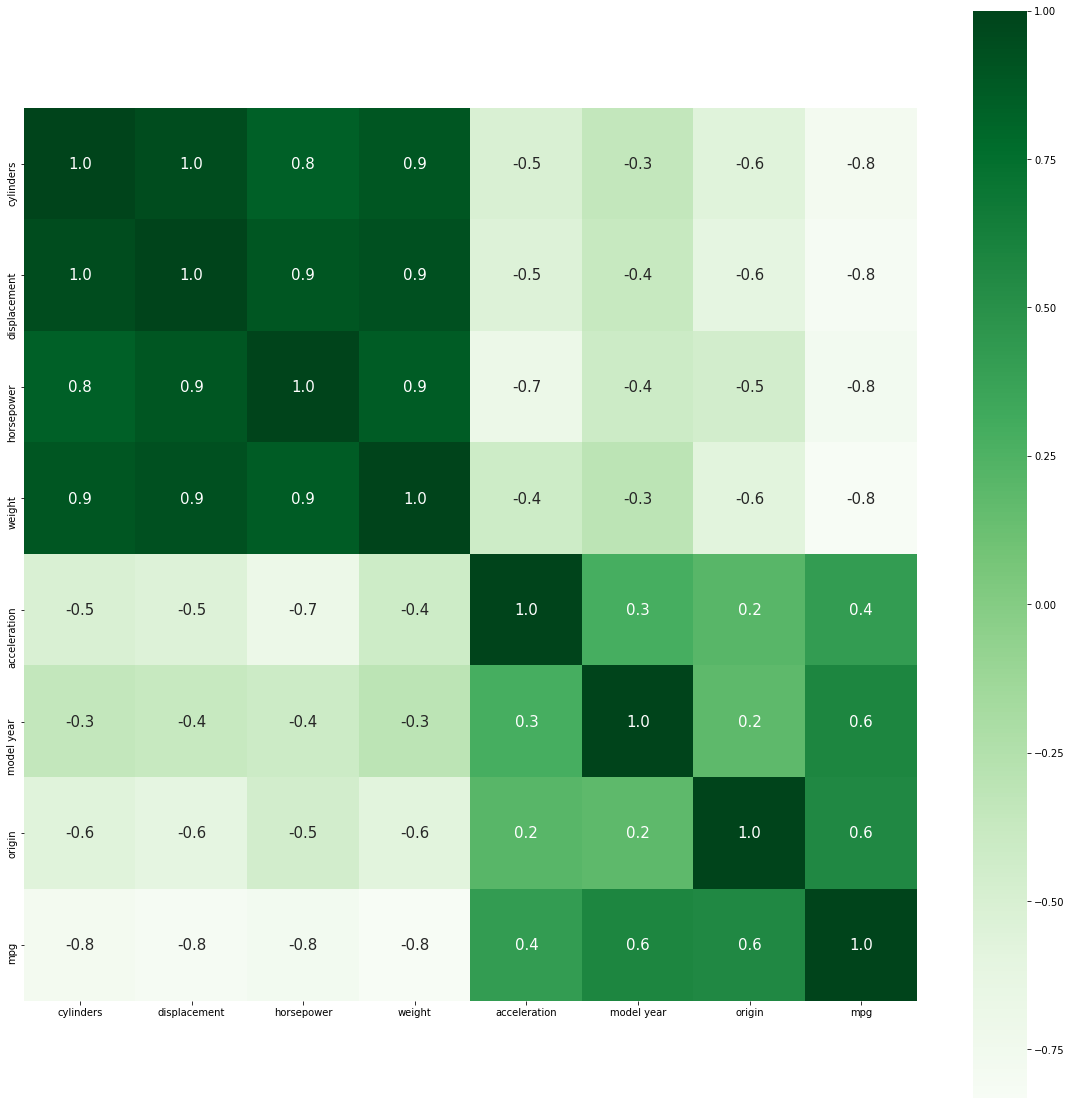

In [15]:
plt.figure(figsize=(20,20))
sb.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')

# Feature Engineering

In [16]:
label = dataset['mpg']
features = dataset.drop(['mpg'], axis=1)

In [17]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()

features = scaler.fit_transform(features.values)
label = scaler.fit_transform(label.values.reshape(-1,1)).flatten()

In [18]:
from sklearn.model_selection import train_test_split
feature_train, feature_test, label_train, label_test = train_test_split(features, label, test_size=0.2, random_state=10)

# Linear Regression

In [32]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(feature_train, label_train)

predictions = lm.predict(feature_test)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(label_test, predictions)
mae = mean_absolute_error(label_test, predictions)
r2 = r2_score(label_test, predictions)
print("MSE (Mean Squared Error)", mse)
print("MAE (Mean Absolute Error)", mae)
print("r^2 score", r2)
print('RMSE (Root Mean Squared Error', np.sqrt(mean_squared_error(label_test, predictions)))

MSE (Mean Squared Error) 0.20826660169611802
MAE (Mean Absolute Error) 0.3684271684436153
r^2 score 0.792478802889181
RMSE (Root Mean Squared Error 0.4563623578869296


# Baseline

In [33]:
# Based on: https://machinelearningmastery.com/regression-tutorial-keras-deep-learning-library-python/
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(13, input_dim=7, kernel_initializer='normal', activation='relu')) # 13 neuron, sesuai dengan 13 features
model.add(Dense(1, kernel_initializer='normal'))

model.compile(loss='mean_squared_error', optimizer='adam')

In [34]:
model.fit(x=feature_train, y=label_train, validation_data=(feature_test, label_test), epochs=50, batch_size=8)

Epoch 1/50
40/40 [==============================] - 0s 4ms/step - loss: 0.9204 - val_loss: 0.8275
Epoch 2/50
40/40 [==============================] - 0s 2ms/step - loss: 0.6988 - val_loss: 0.5577
Epoch 3/50
40/40 [==============================] - 0s 3ms/step - loss: 0.4466 - val_loss: 0.3627
Epoch 4/50
40/40 [==============================] - 0s 2ms/step - loss: 0.3026 - val_loss: 0.2841
Epoch 5/50
40/40 [==============================] - 0s 2ms/step - loss: 0.2391 - val_loss: 0.2566
Epoch 6/50
40/40 [==============================] - 0s 2ms/step - loss: 0.2116 - val_loss: 0.2420
Epoch 7/50
40/40 [==============================] - 0s 2ms/step - loss: 0.1948 - val_loss: 0.2282
Epoch 8/50
40/40 [==============================] - 0s 2ms/step - loss: 0.1796 - val_loss: 0.2158
Epoch 9/50
40/40 [==============================] - 0s 2ms/step - loss: 0.1678 - val_loss: 0.2079
Epoch 10/50
40/40 [==============================] - 0s 2ms/step - loss: 0.1596 - val_loss: 0.1991
Epoch 11/50
40/40 [

In [35]:
predictions = model.predict(feature_test)

predictions = predictions.flatten()

In [36]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(label_test, predictions)
mae = mean_absolute_error(label_test, predictions)
r2 = r2_score(label_test, predictions)
print("MSE (Mean Squared Error)", mse)
print("MAE (Mean Absolute Error)", mae)
print("r^2 score", r2)
print('RMSE (Root Mean Squared Error', np.sqrt(mean_squared_error(label_test, predictions)))

MSE (Mean Squared Error) 0.1516921880759416
MAE (Mean Absolute Error) 0.3006543572696667
r^2 score 0.8488507316799145
RMSE (Root Mean Squared Error 0.38947681327126726


## Deeper Model

In [37]:
deeper_model = Sequential()
deeper_model.add(Dense(13, input_dim=7, kernel_initializer='normal', activation='relu'))
deeper_model.add(Dense(6, kernel_initializer='normal', activation='relu'))
deeper_model.add(Dense(1, kernel_initializer='normal'))

deeper_model.compile(loss='mean_squared_error', optimizer='adam')

deeper_model.fit(x=feature_train, y=label_train, validation_data=(feature_test, label_test), epochs=50, batch_size=8)

Epoch 1/50
40/40 [==============================] - 0s 5ms/step - loss: 0.9916 - val_loss: 0.9855
Epoch 2/50
40/40 [==============================] - 0s 2ms/step - loss: 0.9345 - val_loss: 0.8704
Epoch 3/50
40/40 [==============================] - 0s 2ms/step - loss: 0.7602 - val_loss: 0.6147
Epoch 4/50
40/40 [==============================] - 0s 3ms/step - loss: 0.4798 - val_loss: 0.3720
Epoch 5/50
40/40 [==============================] - 0s 2ms/step - loss: 0.2956 - val_loss: 0.2693
Epoch 6/50
40/40 [==============================] - 0s 2ms/step - loss: 0.2290 - val_loss: 0.2537
Epoch 7/50
40/40 [==============================] - 0s 2ms/step - loss: 0.2087 - val_loss: 0.2337
Epoch 8/50
40/40 [==============================] - 0s 2ms/step - loss: 0.1938 - val_loss: 0.2273
Epoch 9/50
40/40 [==============================] - 0s 3ms/step - loss: 0.1850 - val_loss: 0.2106
Epoch 10/50
40/40 [==============================] - 0s 2ms/step - loss: 0.1722 - val_loss: 0.2058
Epoch 11/50
40/40 [

In [38]:
predictions = deeper_model.predict(feature_test)

predictions = predictions.flatten()

In [39]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(label_test, predictions)
mae = mean_absolute_error(label_test, predictions)
r2 = r2_score(label_test, predictions)
print("MSE (Mean Squared Error)", mse)
print("MAE (Mean Absolute Error)", mae)
print("r^2 score", r2)
print('RMSE (Root Mean Squared Error', np.sqrt(mean_squared_error(label_test, predictions)))

MSE (Mean Squared Error) 0.15982117285646813
MAE (Mean Absolute Error) 0.3101213415859285
r^2 score 0.8407508412547954
RMSE (Root Mean Squared Error 0.39977640357638433


### Wider model

In [40]:
wider_model = Sequential()
wider_model.add(Dense(20, input_dim=7, kernel_initializer='normal', activation='relu'))
wider_model.add(Dense(1, kernel_initializer='normal'))

wider_model.compile(loss='mean_squared_error', optimizer='adam')

history = wider_model.fit(x=feature_train, y=label_train, validation_data=(feature_test, label_test), epochs=100, batch_size=8)

Epoch 1/100
40/40 [==============================] - 0s 4ms/step - loss: 0.9215 - val_loss: 0.8262
Epoch 2/100
40/40 [==============================] - 0s 2ms/step - loss: 0.6736 - val_loss: 0.5092
Epoch 3/100
40/40 [==============================] - 0s 2ms/step - loss: 0.3631 - val_loss: 0.2909
Epoch 4/100
40/40 [==============================] - 0s 2ms/step - loss: 0.2381 - val_loss: 0.2503
Epoch 5/100
40/40 [==============================] - 0s 2ms/step - loss: 0.2048 - val_loss: 0.2343
Epoch 6/100
40/40 [==============================] - 0s 2ms/step - loss: 0.1875 - val_loss: 0.2171
Epoch 7/100
40/40 [==============================] - 0s 2ms/step - loss: 0.1702 - val_loss: 0.2061
Epoch 8/100
40/40 [==============================] - 0s 2ms/step - loss: 0.1586 - val_loss: 0.1967
Epoch 9/100
40/40 [==============================] - 0s 2ms/step - loss: 0.1500 - val_loss: 0.1912
Epoch 10/100
40/40 [==============================] - 0s 2ms/step - loss: 0.1433 - val_loss: 0.1865
Epoch 11/

In [41]:
predictions = wider_model.predict(feature_test)

predictions = predictions.flatten()

In [42]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(label_test, predictions)
mae = mean_absolute_error(label_test, predictions)
r2 = r2_score(label_test, predictions)
print("MSE (Mean Squared Error)", mse)
print("MAE (Mean Absolute Error)", mae)
print("r^2 score", r2)
print('RMSE (Root Mean Squared Error', np.sqrt(mean_squared_error(label_test, predictions)))

MSE (Mean Squared Error) 0.15577684620904927
MAE (Mean Absolute Error) 0.298467868330486
r^2 score 0.8447806928994875
RMSE (Root Mean Squared Error 0.3946857562783958


In [43]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss (MSE)')
  plt.legend()
  plt.grid(True)

In [44]:
history_dataframe = pd.DataFrame(history.history)
history_dataframe['epoch'] = history.epoch
history_dataframe

,loss,val_loss,epoch
0,0.921530,0.826232,0
1,0.673630,0.509185,1
2,0.363135,0.290879,2
3,0.238069,0.250302,3
4,0.204771,0.234312,4
...,...,...,...
95,0.092604,0.152663,95
96,0.092644,0.158301,96
97,0.092093,0.154406,97
98,0.092781,0.156871,98


In [45]:
history_dataframe.sort_values(by='val_loss', ascending=True)

,loss,val_loss,epoch
67,0.101677,0.149071,67
65,0.098459,0.149978,65
90,0.094032,0.149998,90
86,0.093979,0.150073,86
44,0.103489,0.150323,44
...,...,...,...
4,0.204771,0.234312,4
3,0.238069,0.250302,3
2,0.363135,0.290879,2
1,0.673630,0.509185,1


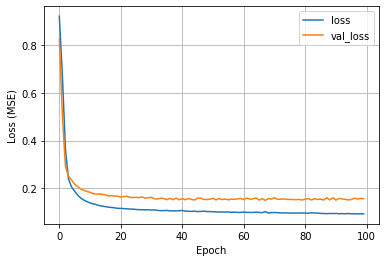

In [46]:
plot_loss(history) # epoch vs loss graph

# Wider Model Tuned

In [47]:
from tensorflow.keras.optimizers import SGD

wider_model_tuned = Sequential()
wider_model_tuned.add(Dense(20, input_dim=7, kernel_initializer='normal', activation='relu'))
wider_model_tuned.add(Dense(1, kernel_initializer='normal'))

opt = SGD(lr=0.001, momentum=0.9)

wider_model_tuned.compile(loss='mean_squared_error', optimizer=opt)

wider_model_tuned.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 20)                160       
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 21        
Total params: 181
Trainable params: 181
Non-trainable params: 0
_________________________________________________________________


In [48]:
history_tuned = wider_model_tuned.fit(x=feature_train, y=label_train, validation_data=(feature_test, label_test), epochs=100, batch_size=8)

Epoch 1/100
40/40 [==============================] - 0s 4ms/step - loss: 0.9493 - val_loss: 0.9043
Epoch 2/100
40/40 [==============================] - 0s 2ms/step - loss: 0.7950 - val_loss: 0.6698
Epoch 3/100
40/40 [==============================] - 0s 2ms/step - loss: 0.4988 - val_loss: 0.3717
Epoch 4/100
40/40 [==============================] - 0s 2ms/step - loss: 0.2765 - val_loss: 0.2678
Epoch 5/100
40/40 [==============================] - 0s 2ms/step - loss: 0.2204 - val_loss: 0.2447
Epoch 6/100
40/40 [==============================] - 0s 2ms/step - loss: 0.1978 - val_loss: 0.2228
Epoch 7/100
40/40 [==============================] - 0s 2ms/step - loss: 0.1823 - val_loss: 0.2085
Epoch 8/100
40/40 [==============================] - 0s 2ms/step - loss: 0.1699 - val_loss: 0.1982
Epoch 9/100
40/40 [==============================] - 0s 2ms/step - loss: 0.1636 - val_loss: 0.1869
Epoch 10/100
40/40 [==============================] - 0s 2ms/step - loss: 0.1558 - val_loss: 0.1850
Epoch 11/

In [49]:
predictions = wider_model_tuned.predict(feature_test)

predictions = predictions.flatten()

In [50]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(label_test, predictions)
mae = mean_absolute_error(label_test, predictions)
r2 = r2_score(label_test, predictions)
print("MSE (Mean Squared Error)", mse)
print("MAE (Mean Absolute Error)", mae)
print("r^2 score", r2)
print('RMSE (Root Mean Squared Error', np.sqrt(mean_squared_error(label_test, predictions)))

MSE (Mean Squared Error) 0.15299571150103647
MAE (Mean Absolute Error) 0.2974476770261352
r^2 score 0.8475518736804338
RMSE (Root Mean Squared Error 0.39114666239281204


In [51]:
history_tuned_dataframe = pd.DataFrame(history_tuned.history)
history_tuned_dataframe['epoch'] = history_tuned.epoch
history_tuned_dataframe.sort_values(by='val_loss', ascending=True)

,loss,val_loss,epoch
63,0.104470,0.147080,63
67,0.103316,0.148110,67
86,0.100233,0.148267,86
90,0.099873,0.148719,90
88,0.099803,0.148948,88
...,...,...,...
4,0.220437,0.244699,4
3,0.276483,0.267815,3
2,0.498769,0.371670,2
1,0.794986,0.669776,1


# Wider Model RMSprop

In [52]:
from tensorflow.keras.optimizers import RMSprop

wider_model_rmsprop = Sequential()
wider_model_rmsprop.add(Dense(20, input_dim=7, kernel_initializer='normal', activation='relu'))
wider_model_rmsprop.add(Dense(1, kernel_initializer='normal'))

opt = RMSprop(lr=0.001)

wider_model_rmsprop.compile(loss='mean_squared_error', optimizer=opt)

wider_model_rmsprop.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 20)                160       
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 21        
Total params: 181
Trainable params: 181
Non-trainable params: 0
_________________________________________________________________


In [53]:
history_rmsprop = wider_model_rmsprop.fit(x=feature_train, y=label_train, validation_data=(feature_test, label_test), epochs=100, batch_size=8)

Epoch 1/100
40/40 [==============================] - 0s 4ms/step - loss: 0.8754 - val_loss: 0.7468
Epoch 2/100
40/40 [==============================] - 0s 2ms/step - loss: 0.5764 - val_loss: 0.4532
Epoch 3/100
40/40 [==============================] - 0s 3ms/step - loss: 0.3296 - val_loss: 0.2865
Epoch 4/100
40/40 [==============================] - 0s 2ms/step - loss: 0.2294 - val_loss: 0.2475
Epoch 5/100
40/40 [==============================] - 0s 2ms/step - loss: 0.2018 - val_loss: 0.2253
Epoch 6/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1843 - val_loss: 0.2095
Epoch 7/100
40/40 [==============================] - 0s 2ms/step - loss: 0.1717 - val_loss: 0.1982
Epoch 8/100
40/40 [==============================] - 0s 2ms/step - loss: 0.1605 - val_loss: 0.1900
Epoch 9/100
40/40 [==============================] - 0s 2ms/step - loss: 0.1518 - val_loss: 0.1865
Epoch 10/100
40/40 [==============================] - 0s 2ms/step - loss: 0.1454 - val_loss: 0.1854
Epoch 11/

In [54]:
predictions = wider_model_rmsprop.predict(feature_test)

predictions = predictions.flatten()

In [55]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(label_test, predictions)
mae = mean_absolute_error(label_test, predictions)
r2 = r2_score(label_test, predictions)
print("MSE (Mean Squared Error)", mse)
print("MAE (Mean Absolute Error)", mae)
print("r^2 score", r2)
print('RMSE (Root Mean Squared Error', np.sqrt(mean_squared_error(label_test, predictions)))

MSE (Mean Squared Error) 0.15048430871933893
MAE (Mean Absolute Error) 0.2894472043733007
r^2 score 0.8500542879294825
RMSE (Root Mean Squared Error 0.3879230706201153


In [56]:
history_rmsprop_dataframe = pd.DataFrame(history_rmsprop.history)
history_rmsprop_dataframe['epoch'] = history_rmsprop.epoch
history_rmsprop_dataframe.sort_values(by='val_loss', ascending=True)

,loss,val_loss,epoch
53,0.102849,0.148192,53
90,0.097960,0.148551,90
70,0.100154,0.148583,70
93,0.097801,0.148956,93
67,0.100911,0.149223,67
...,...,...,...
4,0.201826,0.225341,4
3,0.229438,0.247509,3
2,0.329600,0.286494,2
1,0.576445,0.453242,1


# Kesimpulan

Untuk dataset auto ini, R2 Score paling tinggi dan MSE terendah didapatkan dengan model Wider dengan optimizer RMSprop, dimana:

MSE (Mean Squared Error) 0.15048430871933893

MAE (Mean Absolute Error) 0.2894472043733007

r^2 score 0.8500542879294825

RMSE (Root Mean Squared Error 0.3879230706201153